In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_drivers = pd.read_csv('data/drivers.csv') # ja
df_circuits = pd.read_csv('data/circuits.csv')
df_constructorResults = pd.read_csv('data/constructorResults.csv')
df_constructors = pd.read_csv('data/constructors.csv')
dc_constructorStandings = pd.read_csv('data/constructorStandings.csv')
df_driverStandings = pd.read_csv('data/driverStandings.csv') # ja
df_lapTimes = pd.read_csv('data/lapTimes.csv') # ja
df_pitStops = pd.read_csv('data/pitStops.csv') # ja
df_qualifying = pd.read_csv('data/qualifying.csv')
df_races = pd.read_csv('data/races.csv')
df_seasons = pd.read_csv('data/seasons.csv')
df_sprintResults = pd.read_csv('data/sprintResults.csv')
df_status = pd.read_csv('data/status.csv')


In [3]:
df_merged = df_drivers.merge(df_driverStandings, how='inner', on='driverId')
df_merged = df_merged.merge(df_lapTimes, how='inner', on='driverId')
df_merged = df_merged.merge(df_pitStops, how='inner', on='driverId')

In [17]:
df_merged.shape

(1024274, 26)

In [18]:
df_merged.head(10)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,driverStandingsId,...,lap_x,position_y,time_x,milliseconds_x,raceId,stop,lap_y,time_y,duration,milliseconds_y
0,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,...,1,2,1:40.573,100573,841,1,16,17:28:24,23.227,23227
1,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,...,1,2,1:40.573,100573,841,2,36,17:59:29,23.199,23199
2,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,...,1,2,1:40.573,100573,842,1,12,16:24:40,22.552,22552
3,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,...,1,2,1:40.573,100573,842,2,24,16:45:48,22.611,22611
4,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,...,1,2,1:40.573,100573,842,3,37,17:08:28,25.382,25382
5,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,...,1,2,1:40.573,100573,842,4,52,17:34:48,22.466,22466
6,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,...,1,2,1:40.573,100573,843,1,15,15:29:49,20.878,20878
7,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,...,1,2,1:40.573,100573,843,2,25,15:47:20,20.533,20533
8,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,...,1,2,1:40.573,100573,843,3,38,16:09:38,20.567,20567
9,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,...,1,2,1:40.573,100573,844,1,9,15:17:38,20.833,20833


In [40]:
df_dva = df_merged.groupby(['driverRef']).mean()

df_dva.head(10)

,driverId,number,driverStandingsId,raceId_x,points,position_x,positionText,wins,raceId_y,lap_x,position_y,milliseconds_x,raceId,stop,lap_y,milliseconds_y
driverRef,,,,,,,,,,,,,,,,
alonso,4.0,14.0,7914.930233,41.744186,47.209302,4.069767,4.069767,2.139535,841.0,29.5,5.500000,93138.465517,848.270833,2.041667,26.833333,22965.291667
barrichello,22.0,NaN,8221.697674,42.418605,6.302326,13.255814,13.255814,0.000000,841.0,21.0,14.365854,97482.121951,848.533333,2.066667,26.511111,24896.288889
button,18.0,22.0,8797.291667,42.500000,6.354167,13.250000,13.250000,0.041667,841.0,29.5,6.448276,93526.948276,848.270833,2.104167,25.916667,22646.625000
glock,10.0,NaN,403.250000,27.500000,10.312500,12.375000,12.375000,0.000000,841.0,25.0,18.551020,111482.387755,849.212121,1.757576,26.272727,23640.181818
hamilton,1.0,44.0,1042.631579,27.105263,51.263158,1.578947,1.578947,2.736842,841.0,29.5,1.948276,92975.103448,848.780000,2.300000,28.300000,22923.680000
heidfeld,2.0,NaN,8036.477273,42.318182,28.909091,6.568182,6.568182,0.000000,841.0,29.0,13.385965,95507.035088,845.400000,1.840000,29.320000,22933.320000
kovalainen,5.0,NaN,6878.342857,35.000000,22.171429,7.057143,7.057143,0.228571,841.0,10.0,16.105263,98761.000000,849.315789,1.894737,28.026316,24128.921053
massa,13.0,19.0,8541.069767,43.069767,44.953488,3.953488,3.953488,1.930233,841.0,29.5,6.758621,94059.396552,849.020000,2.080000,28.520000,23345.240000
rosberg,3.0,6.0,7881.139535,41.348837,6.860465,11.325581,11.325581,0.000000,841.0,11.5,7.409091,96448.909091,848.386364,2.022727,27.295455,22450.181818


In [27]:
df_dva.shape

(204,)

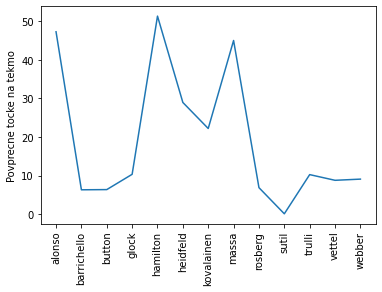

In [62]:
plot = plt.plot(df_dva['points'])
plot = plt.ylabel('Povprecne tocke na tekmo')
plot = plt.xticks(np.arange(0, len(df_dva), 1.0), df_dva.index, rotation=90)